In [88]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore') 

train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_data.csv')
# train = pd.concat([train,test],axis=0)

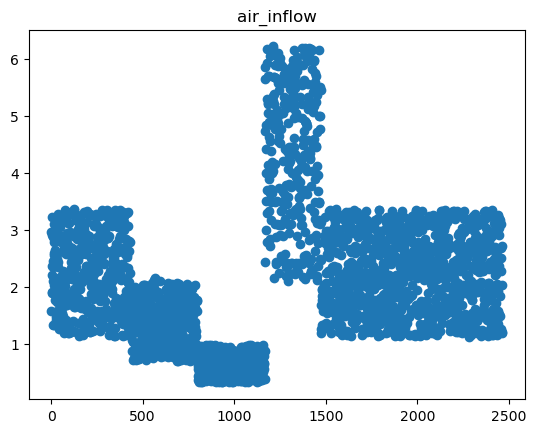

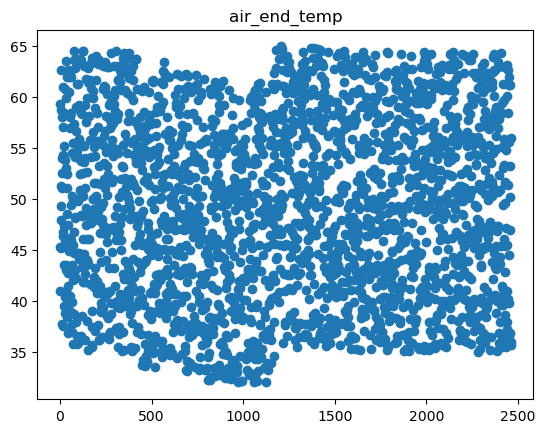

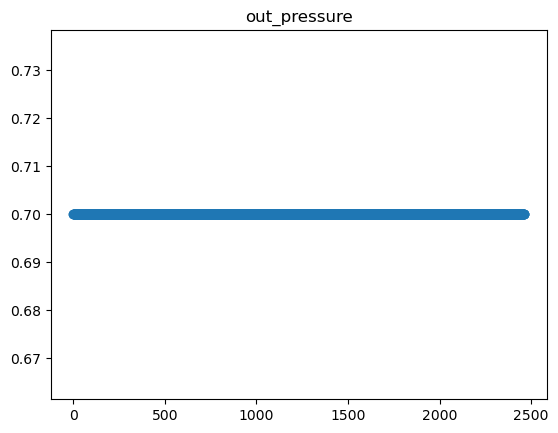

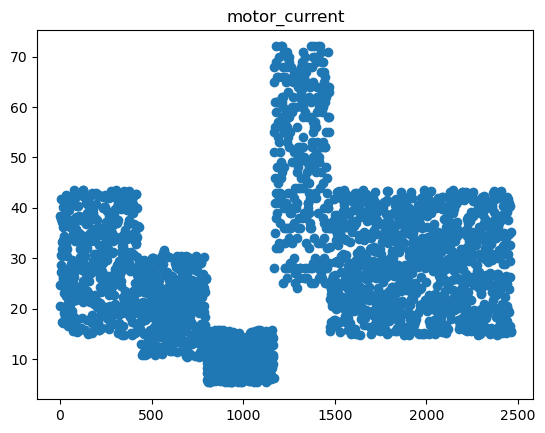

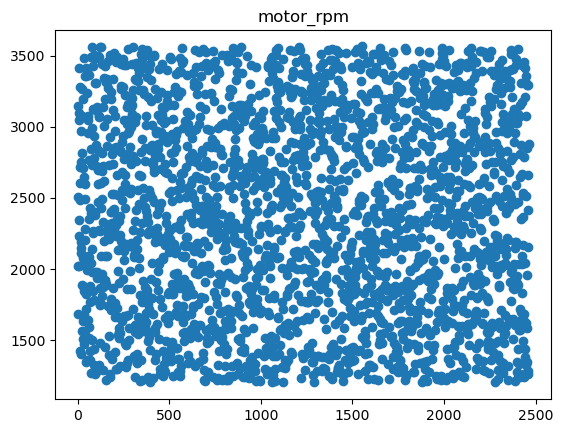

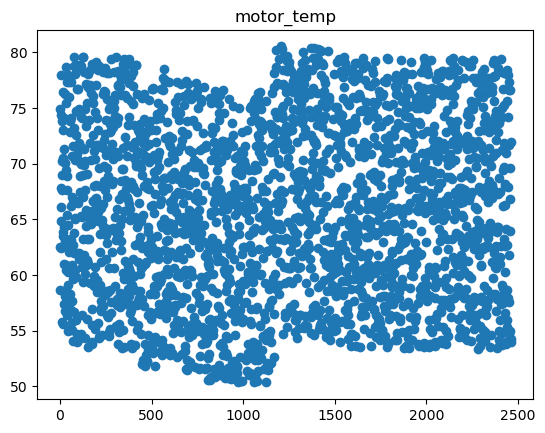

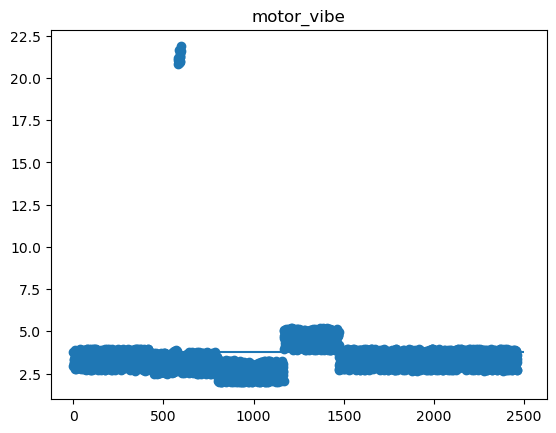

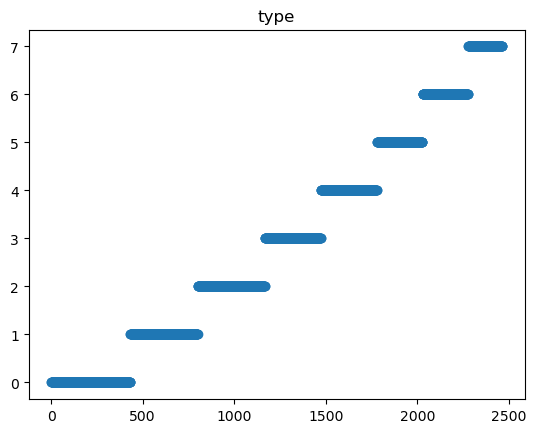

In [89]:
for i in train.columns:
    plt.title(i)
    plt.scatter(range(len(train)),train[i])
    if i == 'motor_vibe':
        plt.hlines(3.75,0,2500)
    plt.show()

In [3]:
train = train[train['motor_vibe'] < 10]

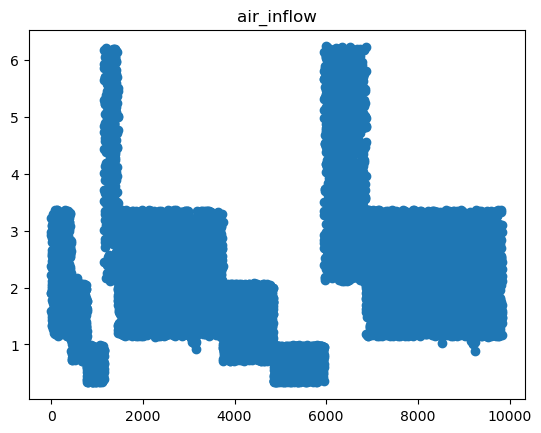

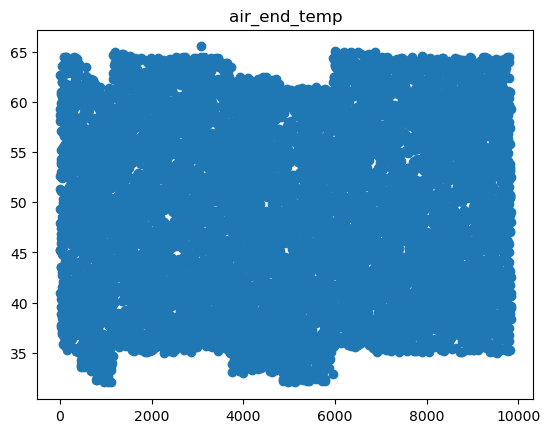

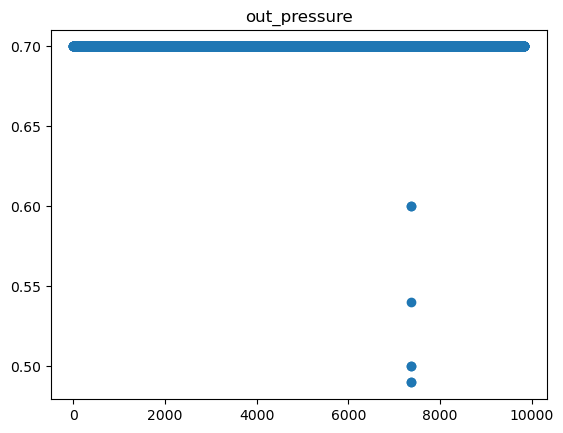

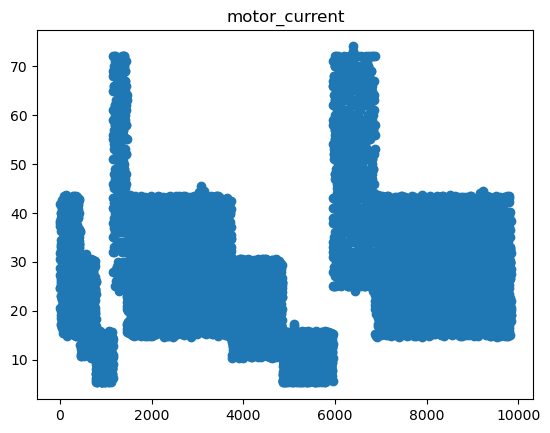

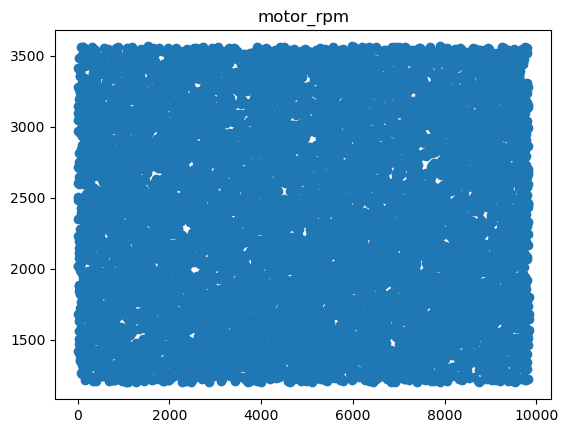

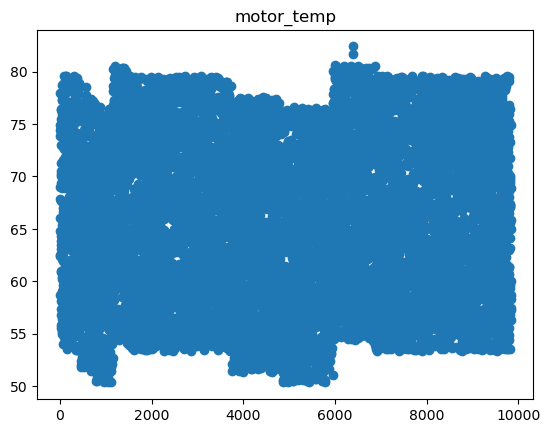

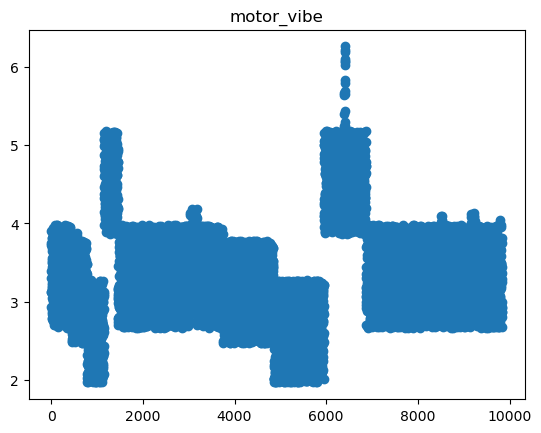

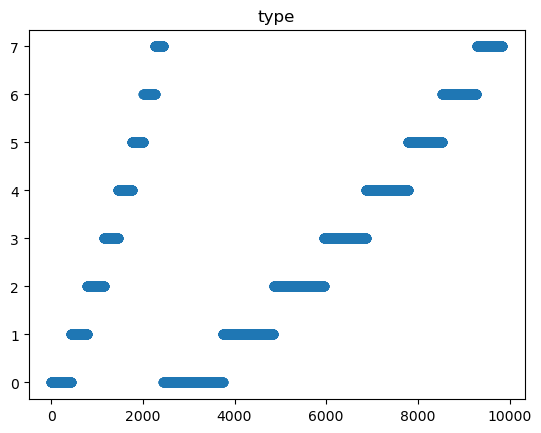

In [4]:
for i in train.columns:
    plt.title(i)
    plt.scatter(range(len(train)),train[i])
    plt.show()

In [5]:
train[(train['type'] == 1)].describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
count,1460.000000,1460.000000,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000,1460.0
mean,1.393007,47.841219,7.000000e-01,20.555890,2385.442466,64.526801,3.127774,1.0
std,0.400772,8.576219,1.876920e-14,5.913063,686.026138,7.623628,0.381469,0.0
min,0.700000,33.010000,7.000000e-01,10.340000,1201.000000,51.340000,2.470000,1.0
25%,1.050000,40.472500,7.000000e-01,15.467500,1795.750000,57.975000,2.800000,1.0
50%,1.390000,47.790000,7.000000e-01,20.515000,2376.000000,64.480000,3.125000,1.0
75%,1.740000,55.357500,7.000000e-01,25.735000,2988.500000,71.205000,3.460000,1.0
max,2.170000,63.450000,7.000000e-01,31.610000,3561.000000,78.510000,3.880000,1.0


In [6]:
train[train['type'] == 1] = train[(train['type'] == 1) & (train['motor_vibe'] < 3.76)]
train = train.drop('out_pressure',axis=1)

In [7]:
# label = [0 for _ in range(len(test))]
# for i in test[test['out_pressure'] != 0.7].index:
#     label[i] = 1

test = test.drop('out_pressure',axis=1)

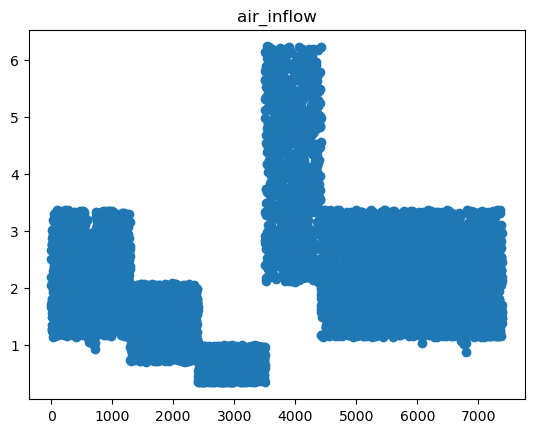

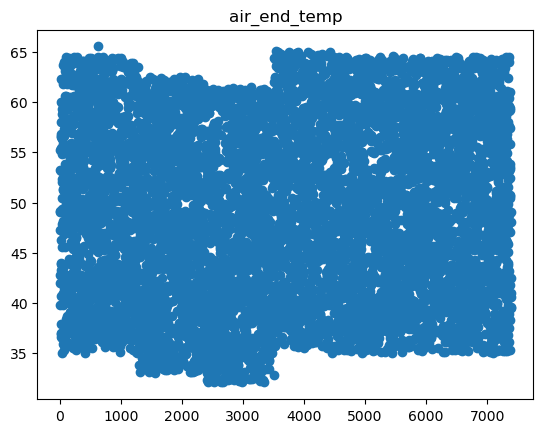

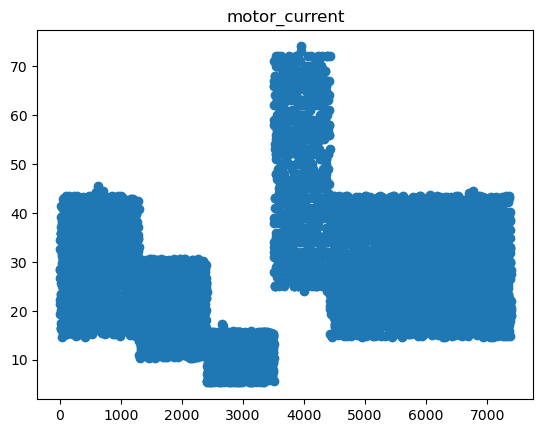

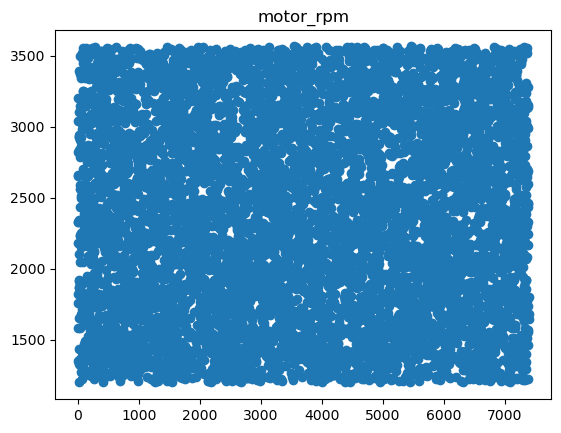

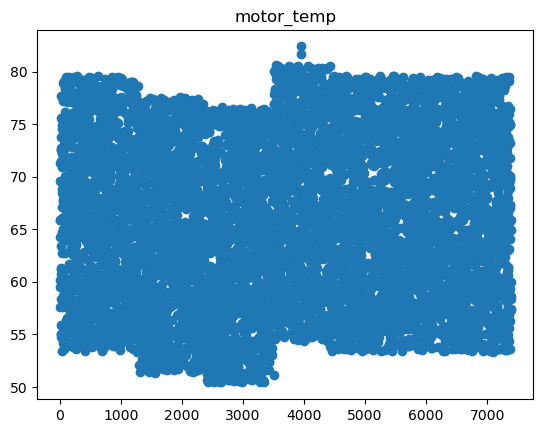

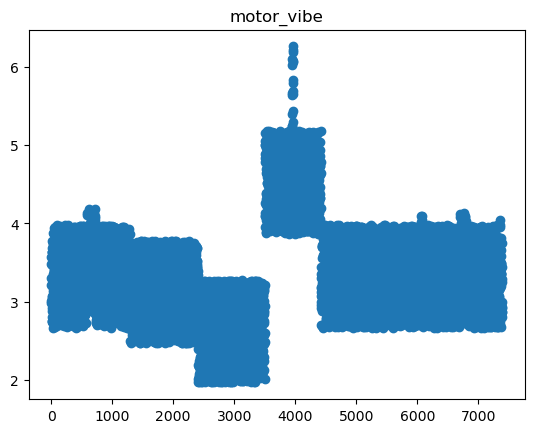

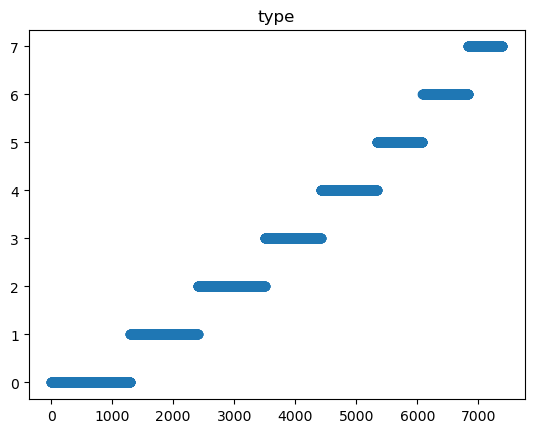

In [8]:
for i in train.columns:
    plt.title(i)
    plt.scatter(range(len(test)),test[i])
    plt.show()

In [9]:
train = train.dropna()
train = train.reset_index(drop=True)

In [10]:
train_type = [i[1] for i in train.groupby('type')]

In [11]:
conc = pd.DataFrame()
for i in train_type:
    conc = pd.concat([conc,i])
train = conc.reset_index(drop=True)

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
tar = pd.DataFrame(ohe.fit_transform(train[['type']]))

In [13]:
setting = 'motor_current'
tar = pd.DataFrame(ohe.fit_transform(train[['type']]))
target = pd.concat([train.loc[:,train.columns[:-1]],tar],axis=1)
label = target[setting]
target = target.drop(setting,axis=1)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(target,label)

LinearRegression()

In [15]:
tar = pd.DataFrame(ohe.fit_transform(test[['type']]))
target = pd.concat([test.loc[:,test.columns[:-1]],tar],axis=1)
label = target[setting]
target = target.drop(setting,axis=1)

In [16]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
value = scaler.fit_transform(np.array(model.predict(target) - test[setting]).reshape(-1,1))
test['value'] = value

In [17]:
# from sklearn.linear_model import LinearRegression
# linear = LinearRegression()
# linear.fit(train.drop('motor_vibe',axis=1),train['motor_vibe'])
# linear.predict(test.drop('motor_vibe',axis=1))

(-2.0, 2.0)

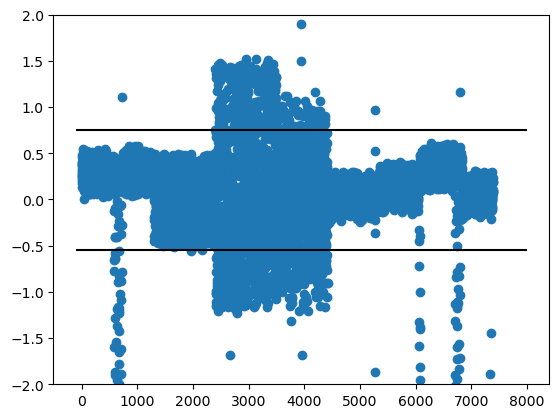

In [18]:
plt.scatter(range(len(value)),value)
plt.hlines(0.75,-100,8000,colors='black')
plt.hlines(-0.55,-100,8000,colors='black')

plt.ylim(-2,2)


In [19]:
test_tar = [test[test['type'] == i] for i in range(8)]

(-3.0, 3.0)

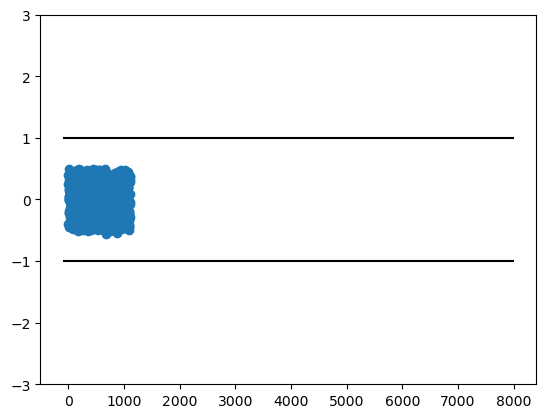

In [82]:
type_ = 1
pt1 = 1
pt2 = -1

plt.scatter(range(len(test_tar[type_]['value'])),test_tar[type_]['value'])
plt.hlines(pt1,-100,8000,colors='black')
plt.hlines(pt2,-100,8000,colors='black')

plt.ylim(-3,3)


In [31]:
# temp = [0 for _ in range(len(test))]

In [83]:
# motor_rpm : Abnormal - 338
tp = pd.DataFrame(value)
tp_ = list(tp[0])
# temp = [0 for _ in range(len(test))]
for i in test_tar[type_].index:
    if tp_[i] > pt1 or tp_[i] < pt2:
        temp[i] = 1

In [84]:
sum(temp)

309

In [22]:
# motor_current : Abnormal - 341
# tp = pd.DataFrame(value)
# tp_ = list(tp[0])
# temp = [0 for _ in range(len(test))]
# for i in range(len(test)):
#     if tp_[i] > 0.8 or tp_[i] < -0.5:
#         temp[i] = 1

In [23]:
# motor vibe : Abnormal - 338
# tp = pd.DataFrame(value)
# tp_ = list(tp[0])
# temp = [0 for _ in range(len(test))]
# for i in range(len(test)):
#     if tp_[i] > 0.164 or tp_[i] < -0.05:
#         temp[i] = 1

In [85]:
test = pd.read_csv('./test_data.csv')
for i in test[test['out_pressure'] != 0.7].index:
    temp[i] = 1

In [86]:
sum(temp)

316

In [87]:
sub = pd.read_csv('./answer_sample.csv')
sub['label'] = temp
sub.set_index('type')
sub.to_csv(f'./submission_{setting}.csv')

---